**Exploratory Data Analysis**


Importing dependencies


In [45]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns   
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split    
from lightgbm import LGBMClassifier

Reading Data


In [3]:
train = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\train_users_2.csv.zip")    
test = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\test_users.csv.zip")
sissions = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\sessions.csv.zip")  
sample_sub = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\sample_submission_NDF.csv.zip")   
age_gender = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\age_gender_bkts.csv.zip")
countris = pd.read_csv(r"C:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\countries.csv.zip") 

EDA
- size of train and test
- missing values and duplicates
- distributions
- feature imprtance

In [11]:
train

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [12]:
test

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,20140930235232,NaN,-unknown-,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE
62092,zp8xfonng8,2014-09-30,20140930235306,NaN,-unknown-,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,-unknown-
62093,fa6260ziny,2014-09-30,20140930235408,NaN,-unknown-,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox
62094,87k0fy4ugm,2014-09-30,20140930235430,NaN,-unknown-,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari


In [15]:
train.value_counts()

id          date_account_created  timestamp_first_active  date_first_booking  gender     age   signup_method  signup_flow  language  affiliate_channel  affiliate_provider  first_affiliate_tracked  signup_app  first_device_type  first_browser  country_destination
00023iyk9l  2014-05-14            20140514195452          2014-05-14          -unknown-  31.0  basic          0            en        direct             direct              omg                      Web         Mac Desktop        Safari         US                     1
ny7bsprffe  2013-04-11            20130411033259          2013-05-02          FEMALE     54.0  facebook       0            en        sem-brand          google              omg                      Web         Mac Desktop        Safari         US                     1
nxxcixe1l3  2012-12-04            20121204063812          2013-02-14          -unknown-  33.0  basic          0            en        sem-non-brand      google              omg                      Web 

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

there is a lot of missing valued in age , date_first_booking

In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

In [22]:
sissions

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [23]:
age_gender

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [24]:
countris    

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [29]:
train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


See the missing values

In [13]:
missing_data = ((train.isnull().sum()/ (len(train)) * 100)) 
missing_data = pd.DataFrame(missing_data, columns=["missing value in train"])  
missing_data.index.name = "columns"  
missing_data = missing_data.sort_values(by="missing value in train", ascending=False)  
missing_data = missing_data[missing_data['missing value in train'] > 0] 
missing_data

,missing value in train
columns,
date_first_booking,58.347349
age,41.222576
first_affiliate_tracked,2.841402


In [14]:
missing_data = ((test.isnull().sum()/ (len(test)) * 100)) 
missing_data = pd.DataFrame(missing_data, columns=["missing value in test"])  
missing_data.index.name = "columns"  
missing_data = missing_data.sort_values(by="missing value in test", ascending=False)  
missing_data = missing_data[missing_data['missing value in test'] > 0] 
missing_data

,missing value in test
columns,
date_first_booking,100.000000
age,46.502190
first_affiliate_tracked,0.032208


duplicate valus

In [46]:
duplicate_count = train.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

duplicate_count = test.duplicated().sum()
print(f"Total duplicate rows test: {duplicate_count}")

Total duplicate rows: 0
Total duplicate rows test: 0


compin the categorical data

In [ ]:
cat_feat = train.select_dtypes(include=['object'])

target distrubition 

c:\Users\Family\Desktop\airbnb-recruiting-new-user-bookings\myvenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


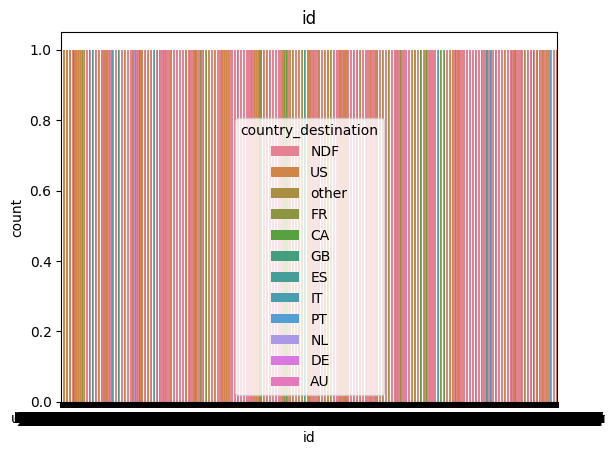

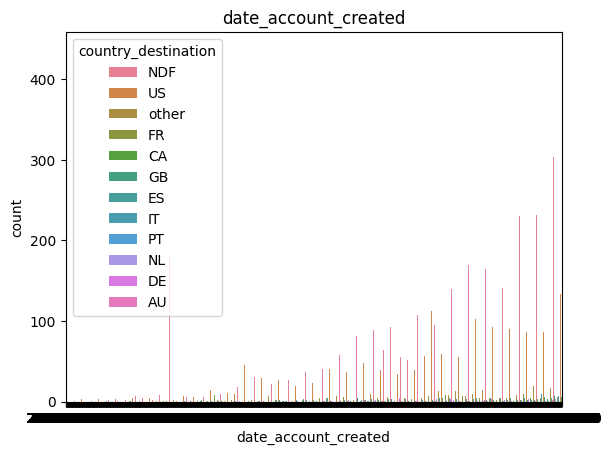

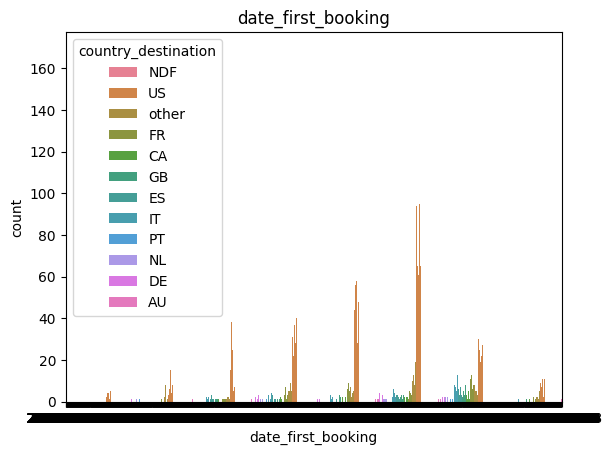

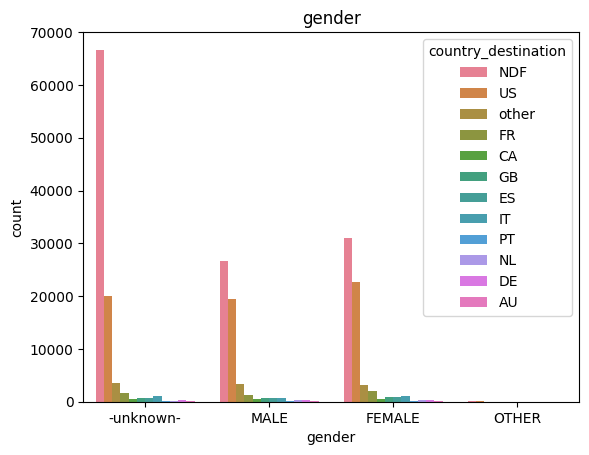

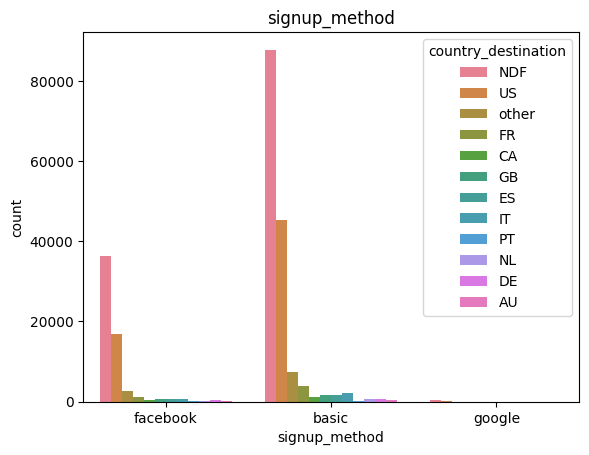

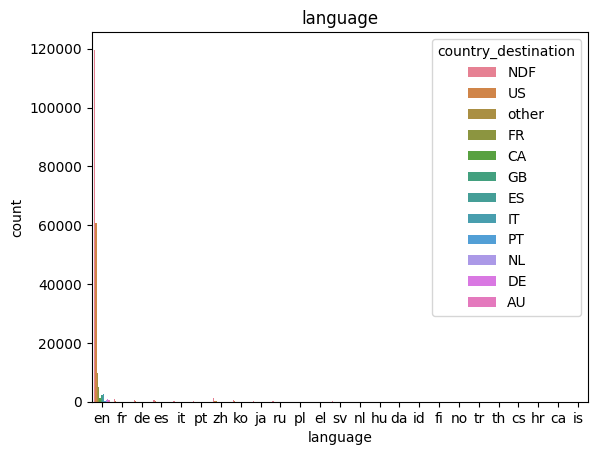

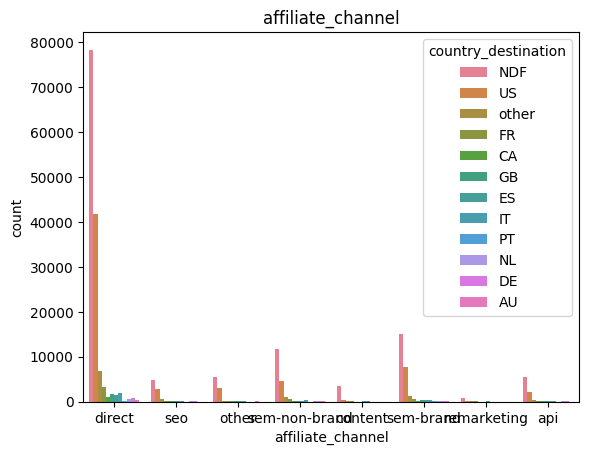

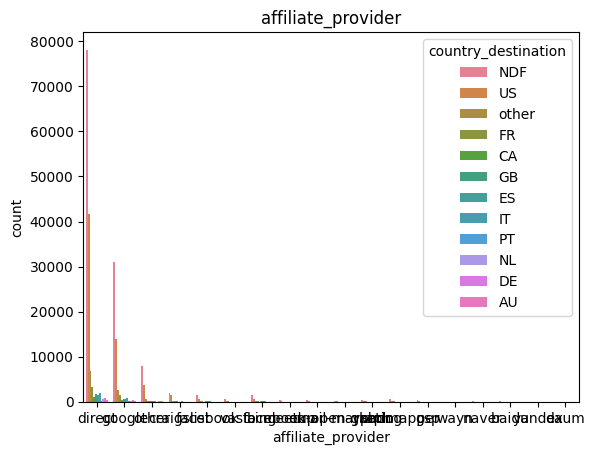

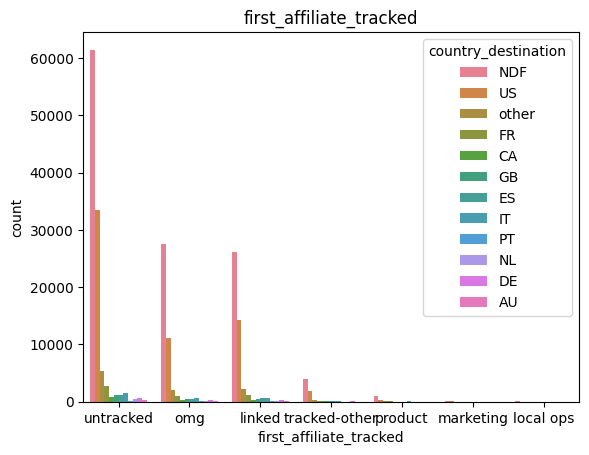

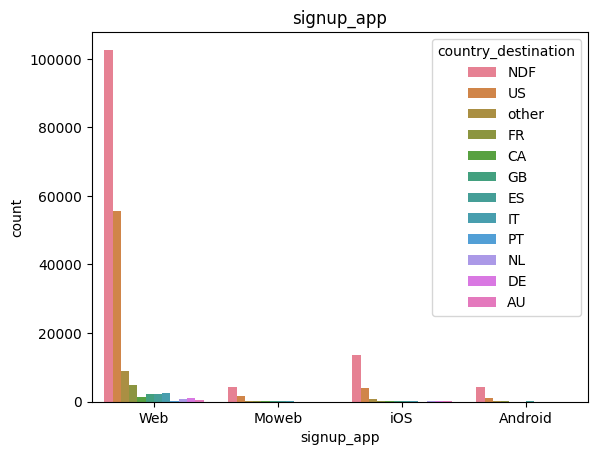

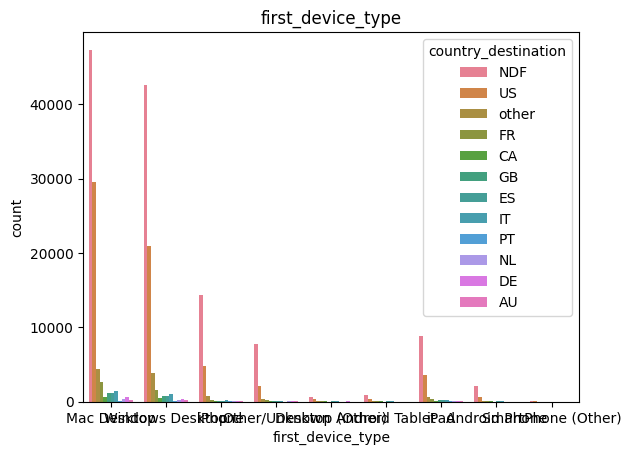

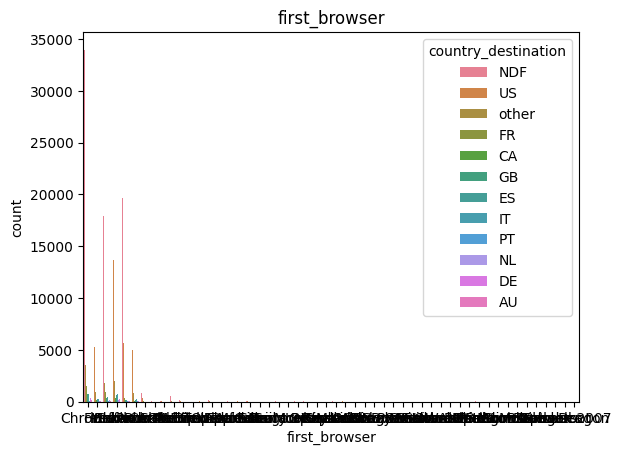

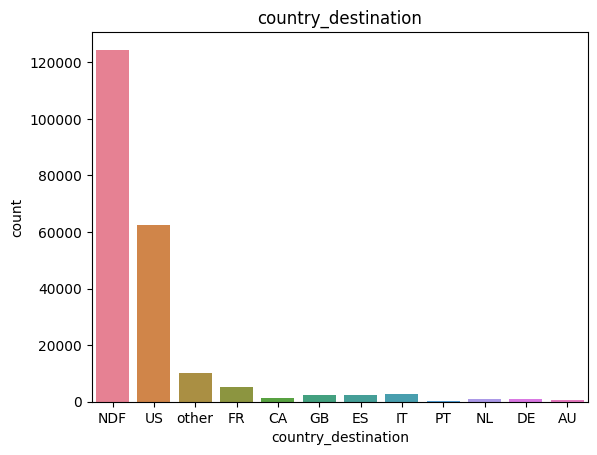

In [19]:
for col in cat_feat:
    plt.title(col)
    sns.countplot(data=train, x=col, hue="country_destination")
    plt.show()

C:\Users\Family\AppData\Local\Temp\ipykernel_4024\1471338700.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=train['age']);


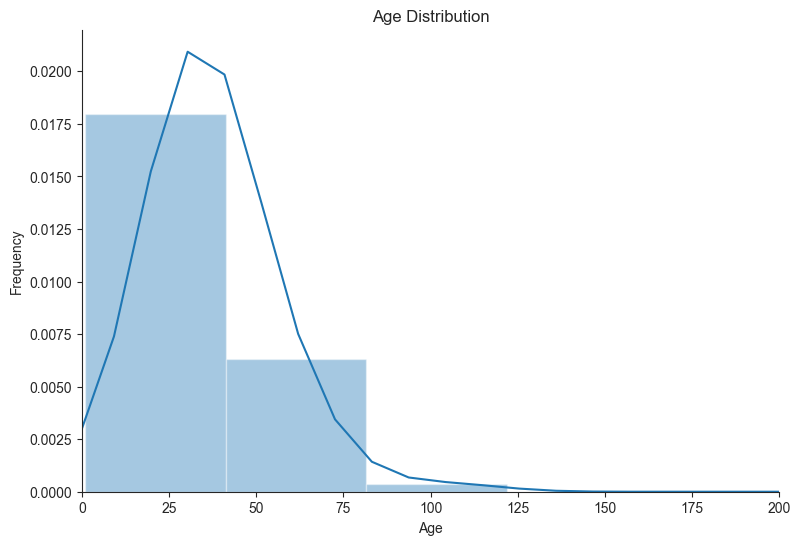

In [35]:
plt.figure(figsize=(9,6))
sns.distplot(x=train['age']);
plt.xlabel('Age')
plt.xlim(0, 200)
plt.ylabel('Frequency') 
plt.title('Age Distribution')
sns.despine()

feature importance 

In [42]:
X = train.drop(columns=['id', 'country_destination'])
X = pd.get_dummies(X, drop_first=True)
y = label_encoder.fit_transform(train['country_destination'])
model = lgb.LGBMClassifier()
model.fit(X, y)
importances = model.feature_importances_
feature_names = X.columns
feature_importances = zip(feature_names, importances)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.452739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5251
[LightGBM] [Info] Number of data points in the train set: 213451, number of used features: 2436
[LightGBM] [Info] Start training from score -5.981447
[LightGBM] [Info] Start training from score -5.007132
[LightGBM] [Info] Start training from score -5.304195
[LightGBM] [Info] Start training from score -4.552922
[LightGBM] [Info] Start training from score -3.749380
[LightGBM] [Info] Start training from score -4.520117
[LightGBM] [Info] Start training from score -4.321365
[LightGBM] [Info] Start training from score -0.538756
[LightGBM] [Info] Start training from score -5.635216
[LightGBM] [Info] Start training from score -6.891265
[LightGBM] [Info] Start 

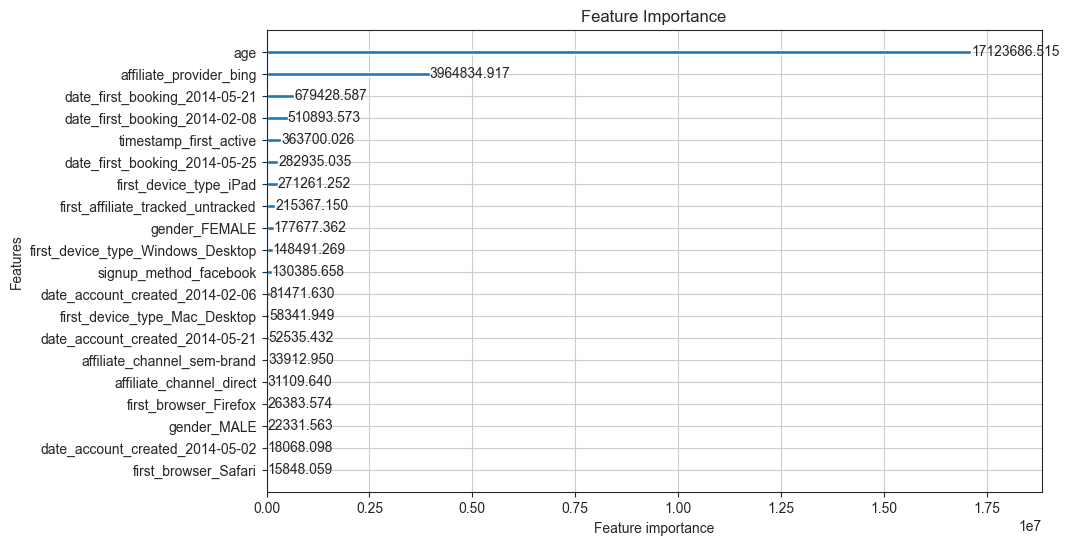

In [43]:
lgb.plot_importance(model, max_num_features=20, importance_type='gain', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()